<a href="https://colab.research.google.com/github/supermansam/EqWATER/blob/master/Copy_of_Visualisation_Leakage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from plotnine import *

In [0]:
DMA0101N = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0101N.csv")
DMA0102N = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0102N.csv")
DMA0103N = pd.read_csv("/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0103N.csv")
#DMA0101N.head()


In [0]:
#(ggplot(DMA0101N[0:20]) + aes('Interval','Net_Flow') + aes(color='Status') + geom_boxplot(stat = "boxplot") +stat_smooth()  )
# facet-grid plots side by side but flipped 
#(ggplot(DMA0101N[0:20]) + aes('Interval', 'Net_Flow') + geom_bar(stat = 'identity', size = 5) + facet_grid('Status~Leak_date_time') + 
 #stat_smooth()) 
for i in range(len(DMA0103N["Net_Flow"])):
  if(DMA0103N["Net_Flow"][i]<0):
    DMA0103N["Net_Flow"][i]=0
    

In [0]:
rf = pd.DataFrame( columns = ['DMA', 'Leak_date_time','Net_Flow','Status','Interval'])
#type(pd.Series(DMA0103N[0:1]))
#DMA0103N[0:1]
#rf.append(DMA0103N[0:1])
#DMA0103N["Net_Flow"][1]
rf = rf.append(DMA0103N[0:1])
rf = rf.append(DMA0103N[1:2])
rf = rf.append(DMA0103N[4:5])
rf = rf.append(DMA0103N[5:6])
rf

,DMA,Leak_date_time,Net_Flow,Status,Interval
0,SW4DM0103,26/03/2018 20.16,0.0,Before,0
1,SW4DM0103,26/03/2018 20.16,1042.0,After,0
4,SW4DM0103,26/03/2018 20.16,0.0,Before,2
5,SW4DM0103,26/03/2018 20.16,841.0,After,2


In [0]:
#df.head()
df = pd.DataFrame( columns = ['DMA', 'Leak_date_time','Net_Flow','Status','Interval']) 
counter = 0
i=0
#for i in range(len(DMA0103N["Net_Flow"])):
while(i<580):
  df = df.append(DMA0103N[i:i+1])
  df["Net_Flow"][i] = DMA0103N["Net_Flow"][i] + DMA0103N["Net_Flow"][i+2]
#  counter+=1
  df = df.append(DMA0103N[i+1:i+2])
  df["Net_Flow"][i+1] = DMA0103N["Net_Flow"][i+1] + DMA0103N["Net_Flow"][i+1+2]
#  counter+=1
  i = i+4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
#resetting index
df = df.reset_index()
columns_to_keep = ['DMA', 'Leak_date_time','Net_Flow','Status','Interval']
df = df[columns_to_keep]

/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


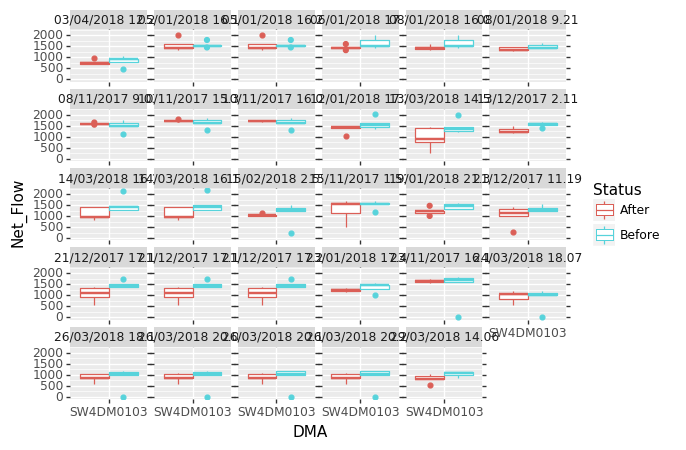

<ggplot: (-9223363273246488958)>

In [0]:
#df["Interval"] = df["Interval"]/2
#(ggplot(df) + aes('Interval','Net_Flow') + aes(color='Status') + geom_boxplot(stat = "boxplot") + facet_wrap('Leak_date_time')  )
#df[0:40]
(ggplot(df) + aes('DMA','Net_Flow') + aes(color='Status') + geom_boxplot(stat = "boxplot") + facet_wrap('Leak_date_time')  )

In [0]:
#df[0:40]
#export_csv = df.to_csv (r'/content/drive/My Drive/RA_IISc/Leak_Detection/RA_leak_data/DMA0103_2C.csv', index = None, header=True)